In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, MaxAbsScaler, LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree

In [2]:
source = 'https://raw.githubusercontent.com/nparis87/MachineLearning/main/Complete.csv'

data = pd.read_csv(source, sep=';')

data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Set
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Train
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Train
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Train
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Train
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Train


In [3]:
data.drop(['Set'], axis = 1, inplace = True)


## Haciendo una conversión de variables ordinales manualmente y personalizada

In [4]:
label = list(data['Spending_Score'].unique()) # se crea una lista con las etiquetas
num = [1,2,3] # lista de valores numéricos para cada etiqueta
mapping = {}  # diccionario de equivalencia entre listas

for x,y in enumerate(label):
    print(x, y)
    mapping[y] = num[x]

print(mapping)

0 Low
1 Average
2 High
{'Low': 1, 'Average': 2, 'High': 3}


In [5]:
data.Spending_Score = data.Spending_Score.map(mapping)

In [6]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,Male,No,22,No,Healthcare,1.0,1,4.0
1,462643,Female,Yes,38,Yes,Engineer,NaN,2,3.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,1,1.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,3,2.0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,3,6.0


In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

## Datos para Random Forest
One Hot Encoder

In [21]:
X = data.drop(['Spending_Score', 'ID'], axis = 1)
Y = data[['Spending_Score']]

X1 = pd.get_dummies(X)

Y = LabelEncoder().fit_transform(Y)

x_train, x_test, y_train, y_test = train_test_split(X1,Y, random_state = 2)

bosque = RandomForestClassifier(max_depth = 3, random_state=0)

In [22]:
x_test

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
5729,25,1.0,4.0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0
7886,46,1.0,4.0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0
7282,38,0.0,1.0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0
191,42,5.0,2.0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0
4242,71,NaN,2.0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8488,49,0.0,1.0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0
8716,20,1.0,5.0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0
5841,32,9.0,1.0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0
1912,39,5.0,3.0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0


In [24]:
data.dropna(inplace = True)

In [55]:
def forest(est=100, prof=2): # estimadores en el bosque de clasificación, profundidad de los árboles
    
    print(f'{est} estimadores con {prof} de profundidad \n')
    
    X = data.drop(['Spending_Score', 'ID'], axis = 1)
    
    Y = data[['Spending_Score']]
    
    X1 = pd.get_dummies(X)
    
    Y = LabelEncoder().fit_transform(Y)
    
    x_train, x_test, y_train, y_test = train_test_split(X1,Y, random_state = 2)
    
    bosque = RandomForestClassifier(n_estimators = est, max_depth = prof, random_state=0).fit(x_train, y_train)
    
    pred = bosque.predict(x_test)
    
    #plot_confusion_matrix(bosque, x_test, y_test, display_labels=label,values_format='d',cmap='hot')
        
    print(classification_report(y_test, pred,target_names=label))
    
#X = data[['Gender']]

## Probando estimadores y profundidad

In [56]:
for p in [10, 20, 50, 100, 200]:
    forest(est=p, prof = 4)

10 estimadores con 4 de profundidad 

              precision    recall  f1-score   support

         Low       0.98      0.80      0.88      1340
     Average       0.61      0.95      0.74       569
        High       0.75      0.57      0.65       315

    accuracy                           0.81      2224
   macro avg       0.78      0.77      0.76      2224
weighted avg       0.85      0.81      0.81      2224

20 estimadores con 4 de profundidad 

              precision    recall  f1-score   support

         Low       0.98      0.79      0.88      1340
     Average       0.60      0.95      0.74       569
        High       0.76      0.58      0.65       315

    accuracy                           0.80      2224
   macro avg       0.78      0.77      0.76      2224
weighted avg       0.85      0.80      0.81      2224

50 estimadores con 4 de profundidad 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

              precision    recall  f1-score   support

         Low       0.98      0.80      0.88      1340
     Average       0.61      0.95      0.74       569
        High       0.76      0.59      0.66       315

    accuracy                           0.81      2224
   macro avg       0.78      0.78      0.76      2224
weighted avg       0.85      0.81      0.81      2224

100 estimadores con 4 de profundidad 

              precision    recall  f1-score   support

         Low       0.98      0.80      0.88      1340
     Average       0.61      0.95      0.75       569
        High       0.74      0.61      0.67       315

    accuracy                           0.81      2224
   macro avg       0.78      0.79      0.77      2224
weighted avg       0.86      0.81      0.82      2224

200 estimadores con 4 de profundidad 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

         Low       0.98      0.80      0.88      1340
     Average       0.62      0.95      0.75       569
        High       0.74      0.61      0.67       315

    accuracy                           0.81      2224
   macro avg       0.78      0.79      0.77      2224
weighted avg       0.86      0.81      0.82      2224



In [64]:
X = data.drop(['Spending_Score', 'ID'], axis = 1)
    
X2 = OrdinalEncoder().fit_transform(X)
Y = LabelEncoder().fit_transform(Y)
#tareas = [('imputer', SimpleImputer(strategy='most_frequent'))]

#X2 = Pipeline(tareas).fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X2,Y, random_state = 2)                           

nbmodel = MultinomialNB()

nbmodel.fit(x_train, y_train)


MultinomialNB()

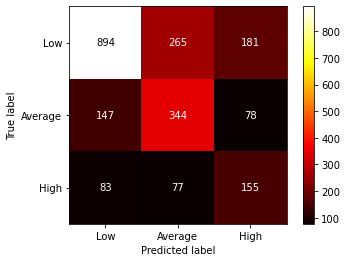

In [65]:
plot_confusion_matrix(nbmodel, x_test, y_test, display_labels=label,values_format='d',cmap='hot')

In [66]:
nbmodel_pred = nbmodel.predict(x_test)
#knn_pred = knn.predict(x_test)
print('TREE RESULTS')
print(classification_report(y_test, nbmodel_pred,target_names=label))


TREE RESULTS
              precision    recall  f1-score   support

         Low       0.80      0.67      0.73      1340
     Average       0.50      0.60      0.55       569
        High       0.37      0.49      0.43       315

    accuracy                           0.63      2224
   macro avg       0.56      0.59      0.57      2224
weighted avg       0.66      0.63      0.64      2224

